In [ ]:
# libraries
import matplotlib.pyplot as plt
import os
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, random_split
import torch

os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
# problema librerie che usano OpenMP, due versioni di OpenMP sono caricate nello stesso processo, ad esempio da PyTorch e da NumPy

In [7]:
dataset_path = os.path.join(os.getcwd(), "DAML_project", 'data_histo')
print(dataset_path)

/home/user/DAML/DAML_project/data_histo


In [8]:
# Trasformazioni
transform = transforms.Compose([
    transforms.Resize((768, 768)),   # il dataset sembra ben organizzato con immagini dalle stesse dimensioni
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)  # normalizzazione standard RGB
])

# trasformiamo l'immagine in un tensore, normalizziamo a uno standard (valutare) e ridimensioniamo(valutare)

In [9]:
full_dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

In [10]:
# divisione in train/val/test
total_size = len(full_dataset)
train_size = int(0.7 * total_size)
val_size = int(0.15 * total_size)
test_size = total_size - train_size - val_size  # per evitare arrotondamenti

train_dataset, val_dataset, test_dataset = random_split(
    full_dataset,
    [train_size, val_size, test_size],
    generator=torch.Generator().manual_seed(42)  # per riproducibilità
)

In [11]:
# dataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [12]:
# classi (ImageFolder le ordina in ordine alfabetico)
print("Classi:", full_dataset.classes)

Classi: ['adenocarcinoma', 'benign', 'squamous_cell_carcinoma']


In [13]:
pretty_classes = ['Adenocarcinoma', 'Benigno', 'Squamoso']

In [14]:
# funzione visualizzazione immagini
def show_batch(loader, classes):
    images, labels = next(iter(loader))
    plt.figure(figsize=(12, 8))
    for i in range(min(8, len(images))):
        ax = plt.subplot(2, 4, i+1)
        img = images[i].permute(1, 2, 0).numpy() * 0.5 + 0.5
        plt.imshow(img)
        plt.title(classes[labels[i]])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

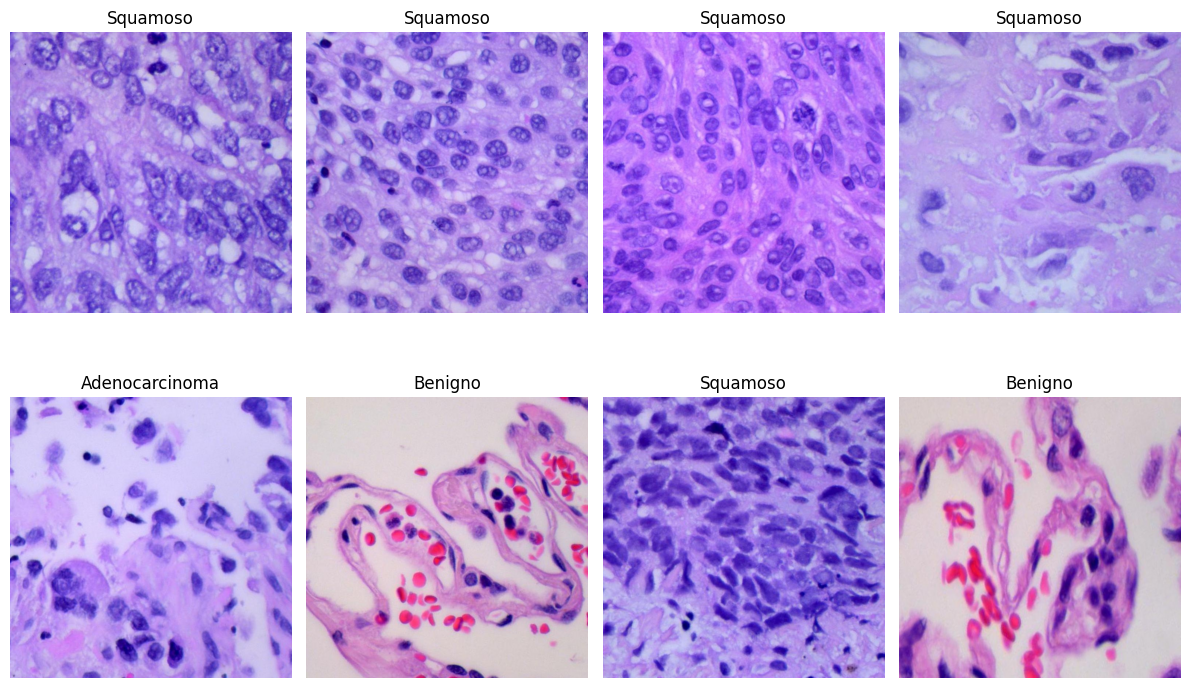

In [15]:
# mostra batch immagini dal train set
show_batch(train_loader, pretty_classes)
